In [2]:
# KNN Classification
from pandas import read_csv
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor



In [3]:
df = pd.read_csv('glass.csv')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df.Type.value_counts()


Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [10]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

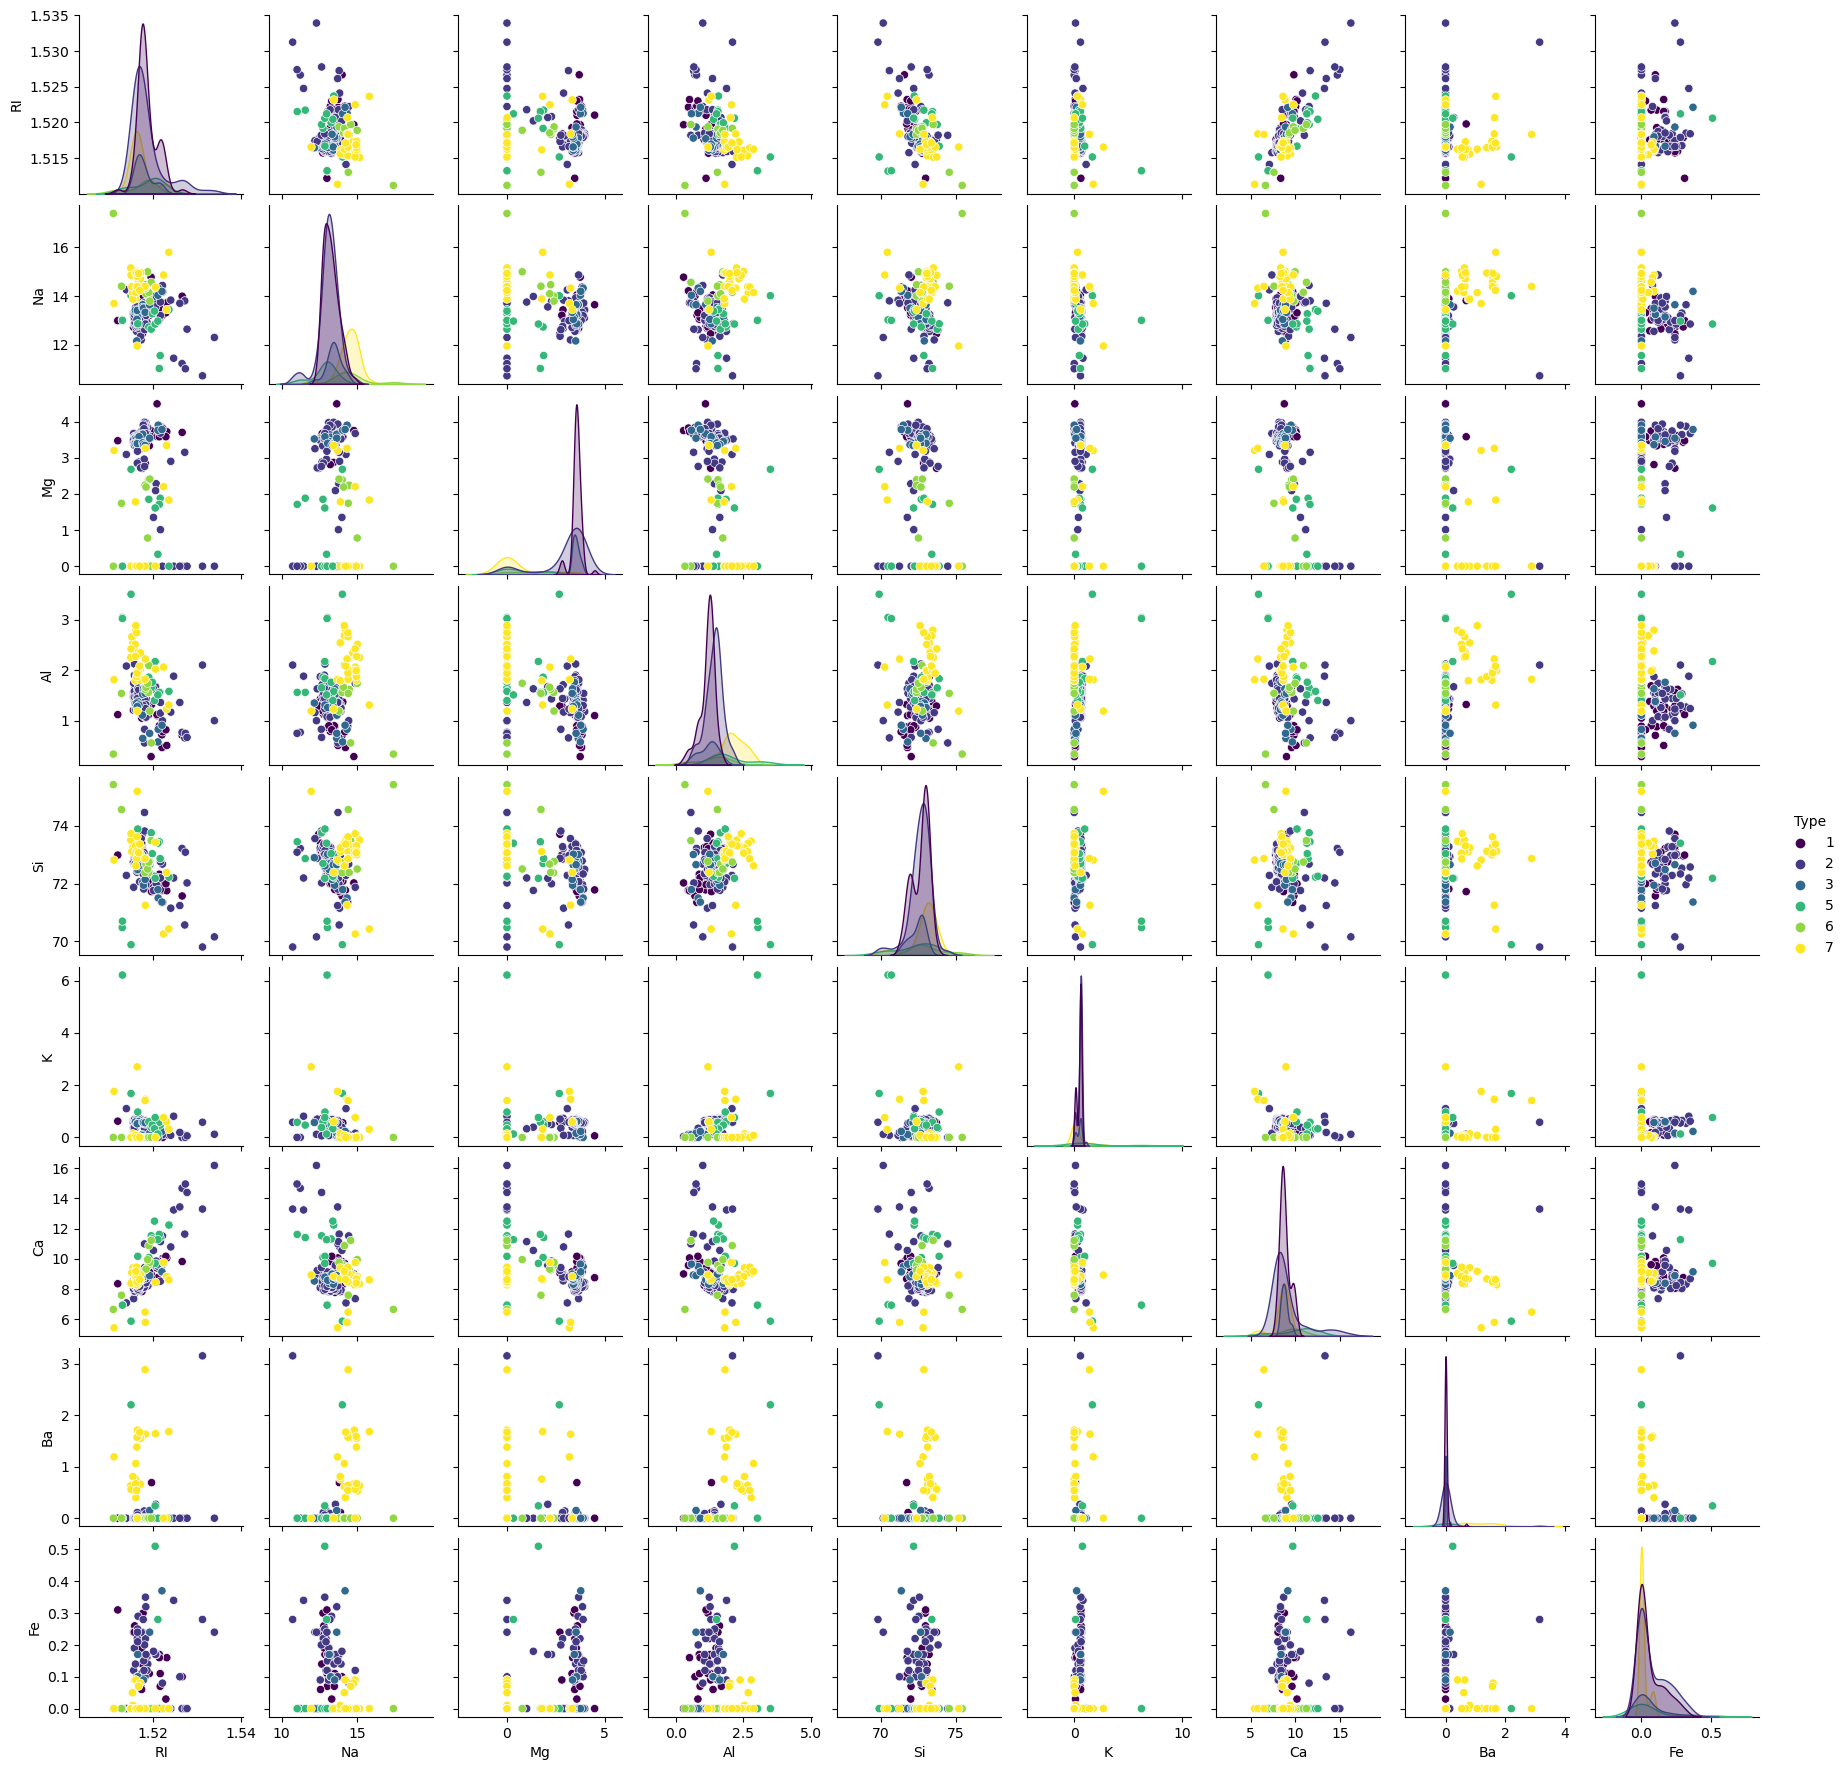

In [11]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, hue='Type', palette='viridis', height=2, diag_kind='kde')



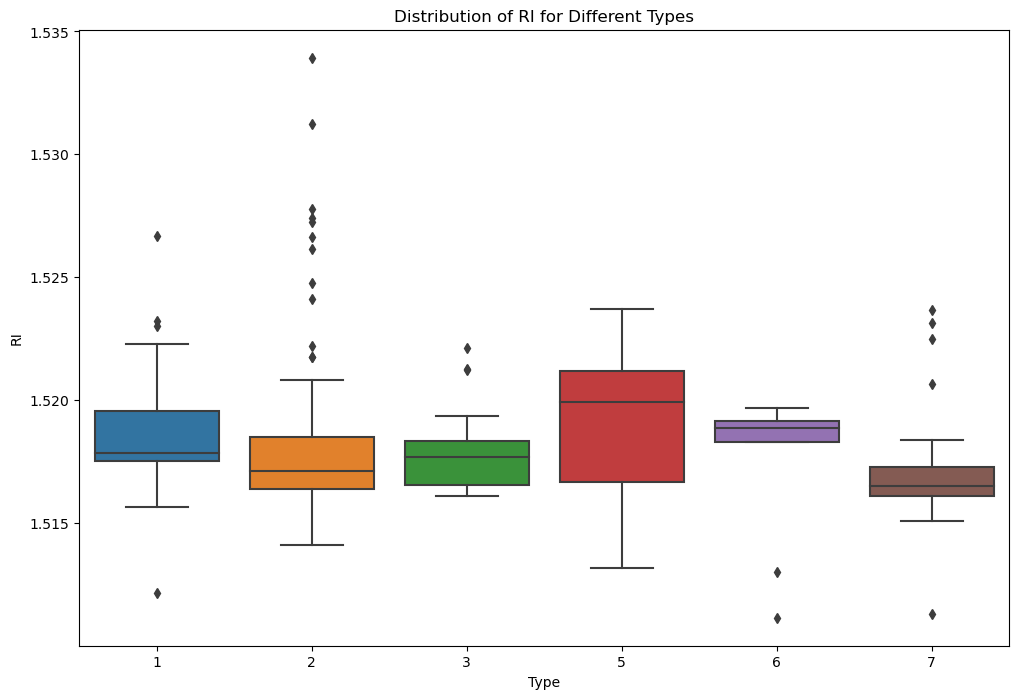

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='RI', data=df)
plt.title('Distribution of RI for Different Types')
plt.show()

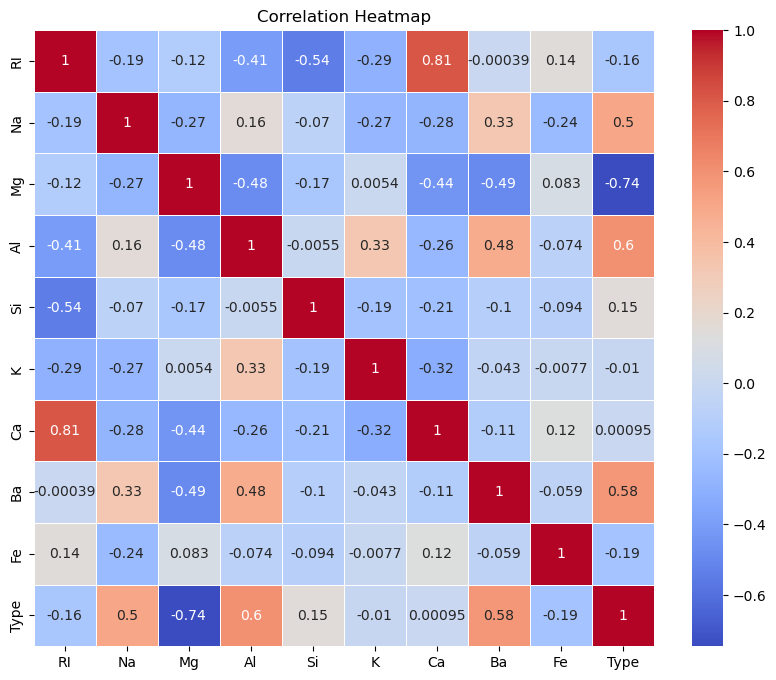

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

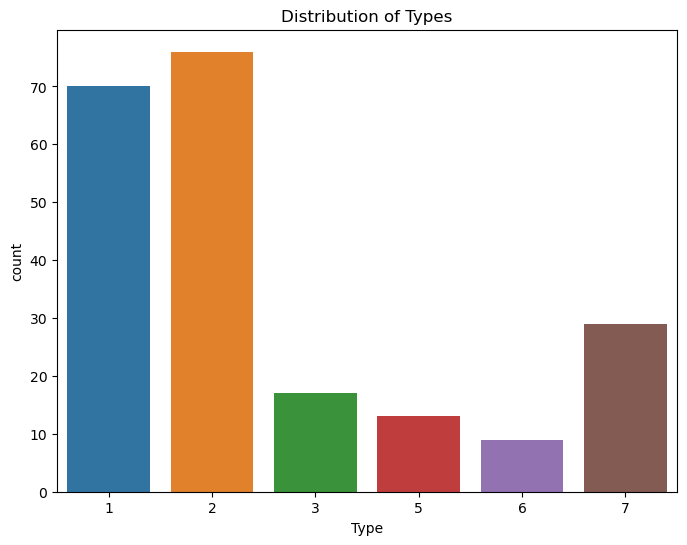

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Types')
plt.show()

In [15]:
# Since data is highly influenced by the scale of data lets standardize 
#the values
from sklearn.preprocessing import StandardScaler

df_std = df.copy()
features_for_std = df.columns
scaler = StandardScaler()
df_std[features_for_std] = scaler.fit_transform(df[features_for_std])

In [16]:
df_std

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


In [17]:
X = df_std.drop('Type', axis=1)
y = df_std['Type']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Number of folds for cross-validation
num_folds = 9
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)


In [20]:
model = KNeighborsRegressor(n_neighbors=15)

In [21]:
model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=15)

In [22]:
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')


In [23]:
results

array([-0.20212559, -0.19863632, -0.41585406, -0.08811465, -0.18123199,
       -0.32395586, -0.2352947 , -0.62831038, -0.73319694])

In [24]:
print(results.mean())

-0.334080055098737


In [25]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
predicted_classes = np.round(predictions)
y_test_classes = np.round(y_test)
accuracy = accuracy_score(y_test_classes, predicted_classes)
print("Accuracy:", accuracy * 100)

Accuracy: 65.11627906976744


In [26]:
print("Cross-Validation Results:")
print("Mean Squared Error (negative):", np.mean(results))
print("Standard Deviation:", np.std(results))

Cross-Validation Results:
Mean Squared Error (negative): -0.334080055098737
Standard Deviation: 0.20602920672095384


### Grid Search for Algorithm Tuning

In [27]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [44]:
X = np.array(df_std.drop('Type', axis=1))
y = np.array(df_std['Type'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Create KNN regression model
model2 = KNeighborsRegressor()

In [51]:
param_grid = {
    'n_neighbors': np.array(range(1, 40)),
}
param_grid 


{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [52]:
grid = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_result = grid.fit(X_train, y_train)

In [53]:
print("Best Parameters: ", grid_result.best_params_)
print("Best Score (Negative Mean Squared Error): ", grid_result.best_score_)

Best Parameters:  {'n_neighbors': 2}
Best Score (Negative Mean Squared Error):  -0.3361412928403952


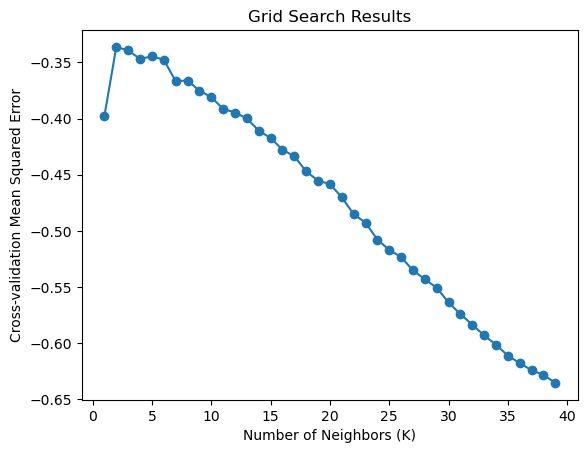

In [55]:
mean_scores = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

# Extract the number of neighbors from the parameters
k_values = [param['n_neighbors'] for param in params]

# Plot the mean squared error for each value of k
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-validation Mean Squared Error')
plt.title('Grid Search Results')
plt.show()


#### Visualizing the CV results

In [61]:
X = np.array(df_std.drop('Type', axis=1))
y = np.array(df_std['Type'])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

k_range = range(1, 60)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())

# Display the mean squared error for each k
result_df = pd.DataFrame({'k': k_range, 'mean_squared_error': k_scores})
result_df.sort_values(by='mean_squared_error', inplace=True)
print(result_df)


     k  mean_squared_error
58  59           -1.199200
57  58           -1.198671
55  56           -1.198208
56  57           -1.198091
54  55           -1.195756
51  52           -1.194341
52  53           -1.194203
53  54           -1.194130
50  51           -1.192234
49  50           -1.188758
48  49           -1.188218
47  48           -1.187517
46  47           -1.184065
39  40           -1.183747
44  45           -1.183738
40  41           -1.183580
45  46           -1.183475
41  42           -1.182442
43  44           -1.181592
42  43           -1.181163
38  39           -1.181157
37  38           -1.181147
36  37           -1.178707
35  36           -1.178322
34  35           -1.176137
32  33           -1.175230
31  32           -1.174985
29  30           -1.174715
33  34           -1.173760
30  31           -1.173711
28  29           -1.172091
27  28           -1.169781
26  27           -1.166407
25  26           -1.163239
24  25           -1.159222
23  24           -1.158578
1

<function matplotlib.pyplot.show(close=None, block=None)>

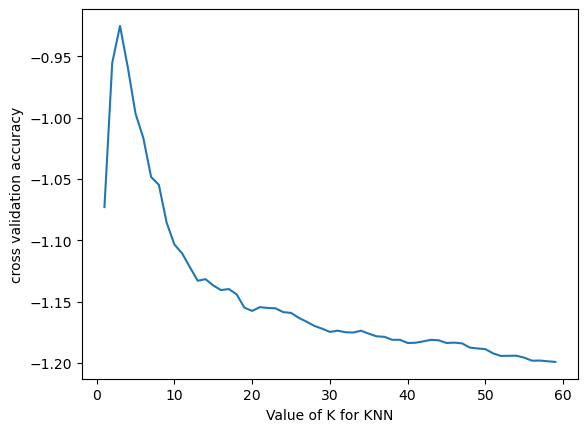

In [65]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('cross validation accuracy')
plt.show